# Mod 6 CS III

In [1]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
#Reading the data
data = pd.read_csv("../demo/FyntraCustomerData.csv", header=0)
data.shape

(500, 8)

In [3]:
data.head()

,Email,Address,Avatar,Avg_Session_Length,Time_on_App,Time_on_Website,Length_of_Membership,Yearly_Amount_Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg_Session_Length    500 non-null    float64
 4   Time_on_App           500 non-null    float64
 5   Time_on_Website       500 non-null    float64
 6   Length_of_Membership  500 non-null    float64
 7   Yearly_Amount_Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [5]:
data.describe()

,Avg_Session_Length,Time_on_App,Time_on_Website,Length_of_Membership,Yearly_Amount_Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


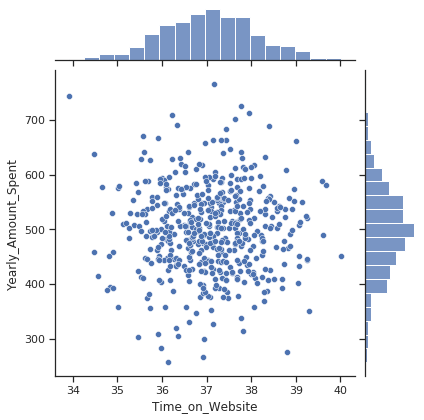

In [6]:
# Problem 1. 
"""Compute -- Use seaborn to create a jointplot to compare the Time on Website
and Yearly Amount Spent columns. Is there a correlation?"""
data_time_web = data.filter(["Time_on_Website", "Yearly_Amount_Spent"])

sns.set(style="ticks", color_codes=True)
sns.jointplot(data=data_time_web , x="Time_on_Website", y="Yearly_Amount_Spent")

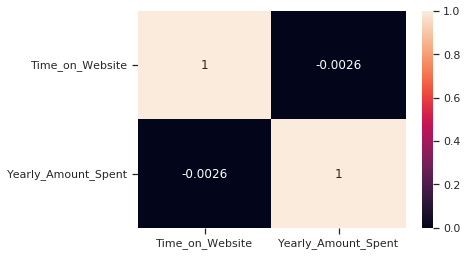

In [7]:
corr_data_time_web_amt = data_time_web.corr()
sns.heatmap(corr_data_time_web_amt, annot=True)


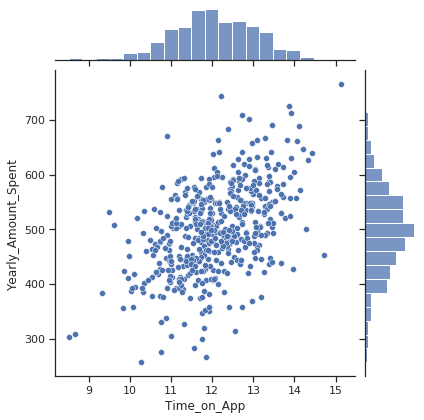

In [8]:
# Problem 2. 
"""Compute --Do the same as above but now with Time on App and Yearly
Amount Spent. Is this correlation stronger than 1st One?"""
data_time_app_amt = data.filter(["Time_on_App" , "Yearly_Amount_Spent"])

sns.set(style="ticks", color_codes=True)
sns.jointplot(data=data_time_app_amt , x="Time_on_App", y="Yearly_Amount_Spent")

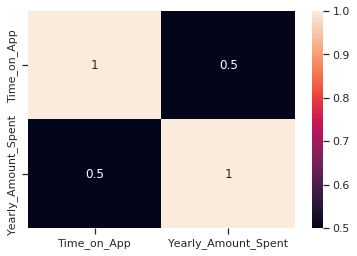

In [9]:
corr_time_app_amt = data_time_app_amt.corr()
sns.heatmap(corr_time_app_amt, annot=True)

#  Is this correlation stronger than 1st One?
# Both have the strong relationship.

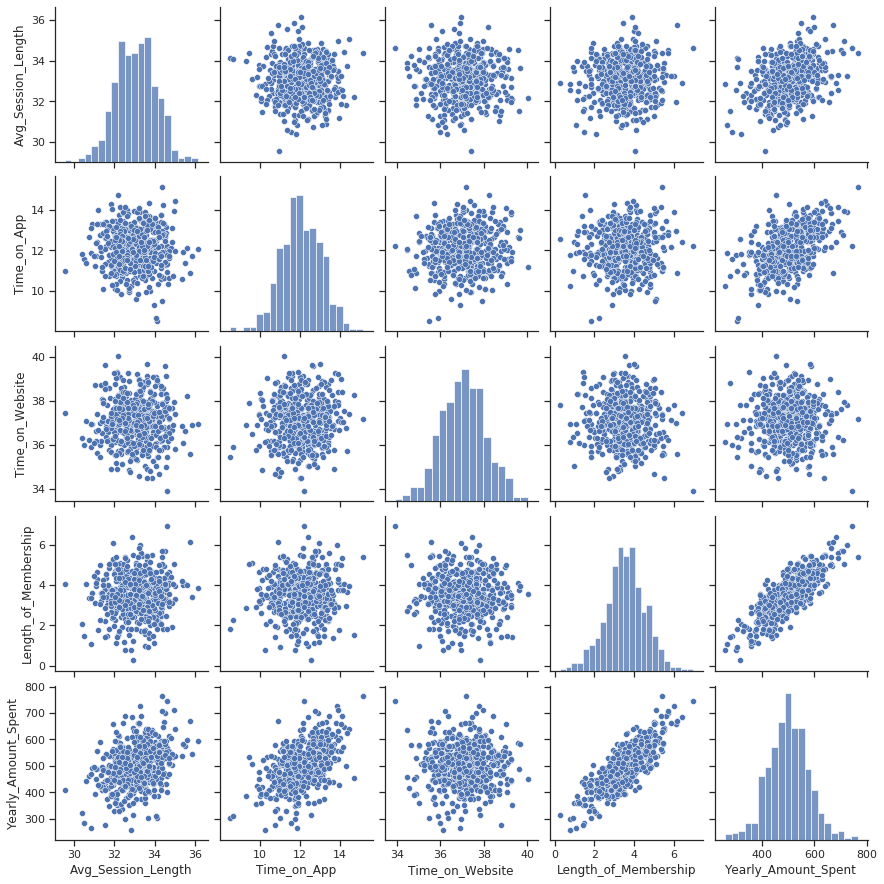

In [10]:
# Problem 3
"""Compute -- Explore types of relationships across the entire data set using
pairplot . Based off this plot what looks to be the most correlated feature with
Yearly Amount Spent?"""
sns.pairplot(data)

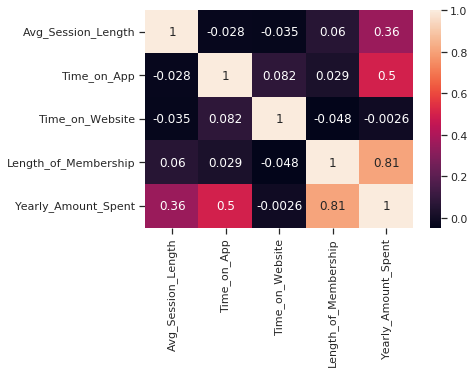

In [11]:
sns.heatmap(data.corr(), annot=True)

# Based on the correlation matrix on the entire data, the length of Membership has the strongest relationship with the Yearly_Amount_Spent. 

In [12]:
# Problem 4. 
""" Compute – Create linear model plot of Length of Membership and Yearly
Amount Spent. Does the data fits well in linear plot? """

' Compute – Create linear model plot of Length of Membership and Yearly\nAmount Spent. Does the data fits well in linear plot? '

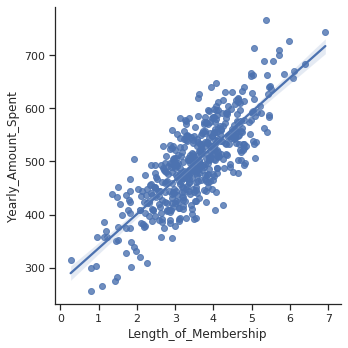

In [13]:
sns.lmplot(x="Length_of_Membership", y="Yearly_Amount_Spent", data=data)

# Yes, the data seems to be fitting well in the linear plot. Let's proceed to find the errors to confirm this statement.

In [14]:
# Problem 5. 
"""Compute – Train and Test the data and answer multiple questions 
-- What is the use of random_state=85? """

X = data.iloc[: , 3:7]
X.head()

,Avg_Session_Length,Time_on_App,Time_on_Website,Length_of_Membership
0,34.497268,12.655651,39.577668,4.082621
1,31.926272,11.109461,37.268959,2.664034
2,33.000915,11.330278,37.110597,4.104543
3,34.305557,13.717514,36.721283,3.120179
4,33.330673,12.795189,37.536653,4.446308


In [15]:
y=data.loc[:, "Yearly_Amount_Spent"]
y.head()

0    587.951054
1    392.204933
2    487.547505
3    581.852344
4    599.406092
Name: Yearly_Amount_Spent, dtype: float64

In [16]:
#Splitting the data in the Training and Testing data

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.3, random_state=85)

#Fixing Random_State value allows us to generate/seed the same random distribution again and again for calculation, enabling the data engineers to work with the 
# same training and testing data during their analysis.

In [17]:
#Ftting the linear regression curve
from sklearn.linear_model import LinearRegression as linreg
lin_reg = linreg().fit(X_train, y_train)

/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/linear_model/least_angle.py:30: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='lar', copy_X=True, eps=np.finfo(np.float).eps,
/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/linear_model/least_angle.py:167: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method

In [18]:
#Calculating the slope and intercept of the Linear Regression curve
print(f"Coefficients: {lin_reg.coef_}")
print(f"Intercept: {lin_reg.intercept_}")

Coefficients: [26.08163249 39.18778762  0.40460005 61.41777824]
Intercept: -1067.3824276105242


In [19]:
#Predicting the data on the testing data
y_pred = lin_reg.predict(X_test)

Text(0.5, 1.0, 'Actual output vs Predicted output')

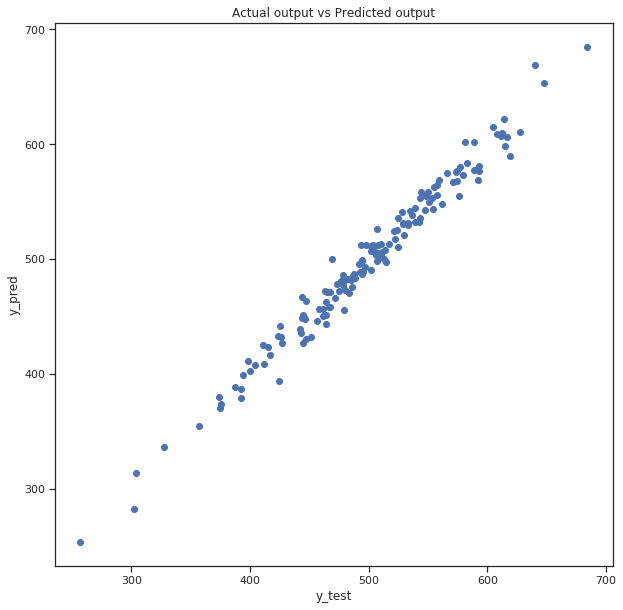

In [20]:
# Problem 6. Compute – Predict the data and do a scatter plot. Check if actual and predicted data match?
plt.figure(figsize=(10,10))
plt.scatter(y_test, y_pred)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.title("Actual output vs Predicted output")

In [21]:
#Problem 7. What is the value of Root Mean Squared Error?
from sklearn import metrics 
print(f"The Mean Absolute Error for the testing data is : {metrics.mean_absolute_error(y_test, y_pred)}")
print(f"The Mean Squared Error  for the testing data is : {metrics.mean_squared_error(y_test, y_pred)}")
print(f"The Root Mean Squared Error for the testing data is : {np.sqrt(metrics.mean_squared_error(y_test, y_pred))}")

The Mean Absolute Error for the testing data is : 8.243650912616777
The Mean Squared Error  for the testing data is : 111.78111141321152
The Root Mean Squared Error for the testing data is : 10.572658672879378


In [22]:
#Generating the coefficients of the each column
coeff = pd.DataFrame(lin_reg.coef_, X.columns)
coeff

,0
Avg_Session_Length,26.081632
Time_on_App,39.187788
Time_on_Website,0.404600
Length_of_Membership,61.417778


In [23]:
# Intepreting the coefficients
# Keeping everything constant, with 1 unit increase in Avg_Session_Length will result in the increase of Yearly_Amount_Spent to 26.08 dollars.
# Keeping everything constant, with 1 unit increase in Time_on_App will result in the increase of Yearly_Amount_Spent to 39.18 dollars.
# Keeping everything constant, with 1 unit increase in Time_on_Website will result in the increase of Yearly_Amount_Spent to 0.40 dollars.
# Keeping everything constant, with 1 unit increase in Length_of_Membership will result in the increase of Yearly_Amount_Spent to 61.41 dollars.

# Bottomline, we could recommend to spend time on website setup as it will result in comparatively less amount of time spent on its development.  